In [ ]:
#pip_install pandas_datareader

In [8]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [5]:
# Get the stock qoute
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-03-31')

# show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-03-25,64.562500,61.075001,62.687500,61.380001,303602000.0,60.907871
2020-03-26,64.669998,61.590000,61.630001,64.610001,252087200.0,64.113029
2020-03-27,63.967499,61.762501,63.187500,61.935001,204216800.0,61.458603


In [6]:
# get number of rows and columns in the dataset
df.shape

(2074, 6)

<function matplotlib.pyplot.show(*args, **kw)>

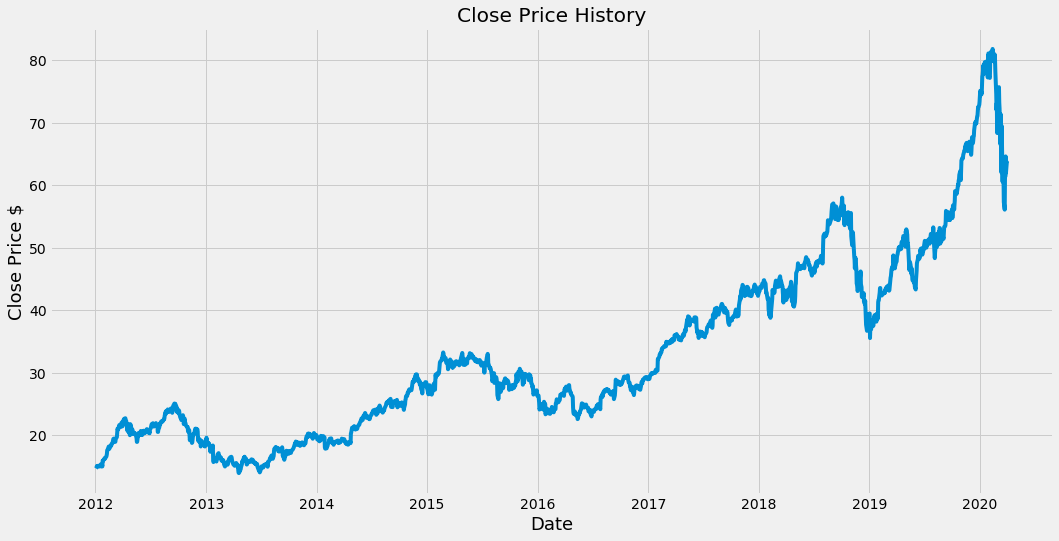

In [10]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.show


In [13]:
# create new dataframe with only close column
df_close = df.filter(['Close'])

# convert dataframe into numpy dataset
dataset = df_close.values

# get number of rows to train the data on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1660

In [14]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205871],
       [0.01447467],
       ...,
       [0.70723259],
       [0.73328171],
       [0.73136577]])

In [19]:
# create scaled train dataset
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if (i<=60):
        print (x_train)
        print (y_train)
        print ()
                   
    

[array([0.01089548, 0.01205871, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541157, 0.01798544,
       0.02030665, 0.01959081, 0.01566948, 0.01941185, 0.01572739,
       0.02954412, 0.02847564, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639334, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995808,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972125, 0.08139505, 0.08499003, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339198, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]



In [21]:
# convert x_train, y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
# reshape the data
x_train = np.reshape (x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1600, 60, 1)

In [29]:
# build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [31]:
# train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1600/1600 [==============================] - 56s 34ms/step - loss: 0.0017


In [32]:
# create test data set
# create new array containing scaled value from index 1601 to 2074
test_data = scaled_data[training_data_len-60:, :]
# create data set x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    


In [33]:
# convert to numpy array
x_test = np.array(x_test)

In [34]:
# reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
# get model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [36]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.4885878908461418

In [46]:
# plot the data
train = df_close[:training_data_len]
valid = df_close[training_data_len:]
valid['Predictions'] = predictions
valid


C:\Users\L0onatic\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Predictions
Date,,
2018-08-08,51.812500,51.959236
2018-08-09,52.220001,52.377956
2018-08-10,51.882500,52.743149
2018-08-13,52.217499,53.000076
2018-08-14,52.437500,53.215717
...,...,...
2020-03-25,61.380001,63.256901
2020-03-26,64.610001,62.948433
2020-03-27,61.935001,63.249580


<function matplotlib.pyplot.show(*args, **kw)>

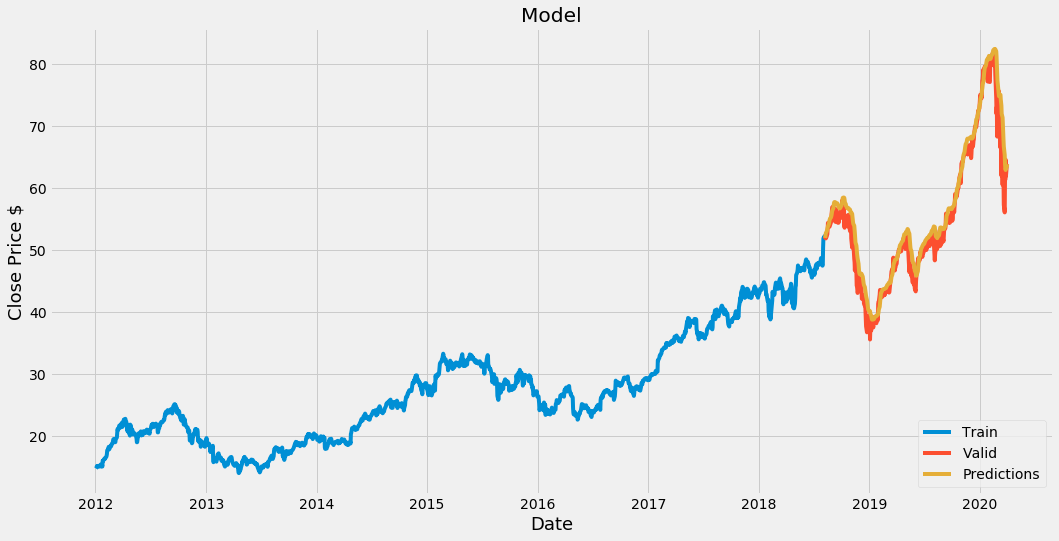

In [49]:
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show



In [50]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-08,51.812500,51.959236
2018-08-09,52.220001,52.377956
2018-08-10,51.882500,52.743149
2018-08-13,52.217499,53.000076
2018-08-14,52.437500,53.215717
...,...,...
2020-03-25,61.380001,63.256901
2020-03-26,64.610001,62.948433
2020-03-27,61.935001,63.249580


In [64]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2021-04-04')
# create new data frame
new_df=apple_quote.filter(['Close'])
# get last 60 days closing price values and convert to array
last_60_days =new_df[-60:].values
# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
X_test = []
# append last 60 days scaled
X_test.append(last_60_days_scaled)
# convert X_test dataset to numpy array
X_test = np.array(X_test)
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# get predicted scaled price
predicted_price = model.predict(X_test)
# undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[117.92694]]


In [63]:
# get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2021-03-31', end = '2021-03-31')
print (apple_quote2['Close'])

Date
2021-03-31    122.150002
Name: Close, dtype: float64
